# Contenido 
> - [Cargar Datos](#data)
> - [Learner y modelo](#model)
> - [Entrenamiento](#training)
> - [Experimentos](#experiments)

In [1]:
import fastai.vision.all as fv
import torch
import torch.nn as nn
import torch.nn.functional as F
import random 
import pandas as pd
from pathlib import Path
import gc


In [2]:
torch.cuda.is_available()

True

In [3]:
path = Path("storage/faces")
path.ls()

(#16738) [Path('storage/faces/3_puercoespin_gato_1_03343.jpg'),Path('storage/faces/4_puercoespin_papa_1_28948.jpg'),Path('storage/faces/34_adios_gato_0_67964.jpg'),Path('storage/faces/1_puercoespin_mama_1_46779.jpg'),Path('storage/faces/39_hola_gato_1_69915.jpg'),Path('storage/faces/27_hola_perro_1_10332.jpg'),Path('storage/faces/22_adios_papa_1_38311.jpg'),Path('storage/faces/63_adios_papa_0_02210.jpg'),Path('storage/faces/40_adios_papa_0_22595.jpg'),Path('storage/faces/23_hola_gato_1_69000.jpg')...]

In [4]:
# Cargamos las imagenes satelitales del amazonas
imgs = (path).ls()

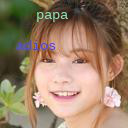

In [5]:
fv.PILImage.create(imgs[19])

# hola, adios, puercoespin
def cat1(archivo):
    return archivo.stem.split('_')[1]
    #cat1 =  archivo.name.split('_')[1].split(' ')
    #return cat1

# papa, mama, perro, gato
def cat2(archivo):
    return archivo.stem.split('_')[2]
    #cat2 = archivo.name.split('_')[2].split(' ')
    #return cat2

In [5]:
# edad
def age(archivo):
    #values = archivo.name.split("_")
    return float(archivo.stem.split('_')[0])

In [6]:
def cats(archivo):
    return [archivo.stem.split('_')[1], archivo.stem.split('_')[2]]
    #cat2 = archivo.name.split('_')[2].split(' ')
    #return cat2

8_adios_papa_0_48617.jpg --> 8.0, ['adios', 'papa']


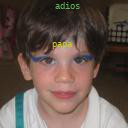

In [7]:
f = random.choice(imgs)
#print(f"{f.name} --> {age(f)}, {cat_1(f)}, {cat_2(f)}")
print(f"{f.name} --> {age(f)}, {cats(f)}")
fv.PILImage.create(f)

<a id="data"><h1><strong>Cargar datos</strong></h1></a>

In [8]:
def load_data(folder, img_size, batch_size):
  tfms = fv.aug_transforms(flip_vert=False, 
                           max_rotate=10, 
                           max_lighting=0.25,
                           max_zoom=1.1, 
                           max_warp=0.1,
                          do_flip=False) #añadimos flip = false para no voltear las palabras

  data = fv.DataBlock(blocks = (fv.ImageBlock, fv.RegressionBlock, fv.MultiCategoryBlock),
                      get_items=fv.get_image_files,
                      get_y=(age, cats),
                      splitter=fv.RandomSplitter(1/10), 
                      item_tfms=fv.Resize(img_size),
                      batch_tfms=tfms,
                      n_inp=1
                      )
  return data.dataloaders(folder, bs=batch_size)

In [9]:
data = load_data(path, img_size=224, batch_size=60)

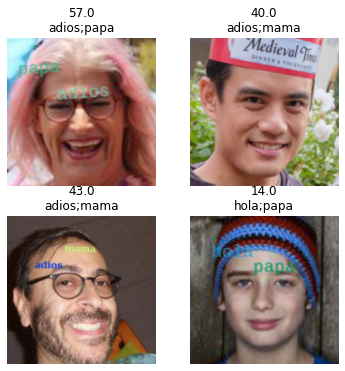

In [11]:
data.show_batch(max_n=4)

In [12]:
x, y, z = data.one_batch()

In [13]:
x.shape # 150 = tamaño de mis imagenes # 60 = tamaño de mi batch

torch.Size([60, 3, 224, 224])

In [14]:
y.shape, y # edad

(torch.Size([60]),
 tensor([28., 69., 15., 22., 35., 58., 38., 74., 23., 15., 29., 24., 55., 27.,
         27., 32., 42., 23., 65.,  6., 25., 50., 12., 34., 33., 42., 44., 30.,
         70., 20., 22., 42., 33.,  1., 16., 57., 18., 23., 16., 62., 16., 23.,
         15., 38.,  7.,  9., 47., 62., 25., 28., 33., 35.,  7.,  0., 18.,  9.,
         76., 58., 20., 24.], device='cuda:0'))

In [15]:
z.shape, z # 7 = ['adios', 'gato', 'hola', 'mama', 'papa', 'perro', 'puercoespin']

(torch.Size([60, 7]),
 TensorMultiCategory([[1., 1., 0., 0., 0., 0., 0.],
         [0., 0., 1., 1., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 1.],
         [1., 0., 0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0., 1., 0.],
         [1., 0., 0., 0., 0., 1., 0.],
         [0., 0., 1., 0., 1., 0., 0.],
         [0., 1., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 1., 1.],
         [0., 0., 1., 1., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 1.],
         [0., 0., 1., 1., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 1.],
         [1., 0., 0., 0., 0., 1., 0.],
         [0., 0., 1., 0., 1., 0., 0.],
         [1., 0., 0., 0., 1., 0., 0.],
         [0., 0., 1., 0., 1., 0., 0.],
         [0., 0., 1., 1., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 1.],
         [0., 0., 0., 1., 0., 0., 1.],
         [0., 0., 0., 1., 0., 0., 1.],
         [0., 1., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 1.],
         [0., 0., 0., 0., 1., 0., 1.],
         [0., 0., 1., 1., 0.,

In [16]:
data.c # Categorias de mis datos

(#2) [1,7]

<AxesSubplot:>

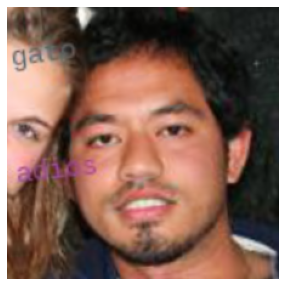

In [17]:
fv.show_image(x[0])

<a id="model"><h1><strong>Learner y modelo</strong></h1></a>

In [21]:
#def t_split(m):
    #return [list(group.parameters()) for group in [m[:6], m[6:-8],m[-8:]]]

In [10]:
def resnet_split(m):
    return fv.L(m[:6], m[6:-8], m[-8:]).map(fv.params)

In [11]:
class Normalizer(nn.Module):
    def __init__(self, mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]):
        super().__init__()
        self.mean = torch.tensor(mean)[None,:,None,None]
        self.std = torch.tensor(std)[None,:,None,None]
        
    def forward(self, x):
        m = self.mean.to(x)
        s = self.std.to(x)
        return (x-m)/s

In [12]:
def my_fun_loss(yp, age, cats):
    #yp=torch.Size([60, 8]) #age=torch.Size([60]) #cats=torch.Size([60, 7])
    #7 = ['adios', 'gato', 'hola', 'mama', 'papa', 'perro', 'puercoespin']
    #print(yp.shape, age.shape, cats.shape)
    yp_age = yp[:,0]
    yp_cats = yp[:,1:]
    #print(cats.device, yp_cats.device)
    
    #pos_weight = torch.zeros([7]).cuda()
    #criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    #bce = criterion(yp_cats, cats)
    
    #mse = F.mse_loss(yp_age, age)
    #bce = F.binary_cross_entropy_with_logits(yp_cats, cats)
    
    #print(F.cross_entropy(yp_cats.long(), cats)) #RuntimeError: "host_softmax" not implemented for 'Long'
    
    # Reescalamos para igualar al accuracy de cats
    return F.l1_loss(yp_age, age)/100 + F.binary_cross_entropy_with_logits(yp_cats, cats)
    #return bce+mse/10

> **Comentario:** Cuando uso F.cross_entropy me dice que mi predictor (si es que esa palabra existe) debe de ser del tipo long, cuando lo hago long me arroja el error de: RuntimeError: "host_softmax" not implemented for 'Long'
por lo que he elegido usar una alternativa que ofrece pytorch para bce. 
[torch.nn.BCEWithLogitsLoss](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html?highlight=withlogits)
y búsque en fastai para ver si funcionaban igual pero no encontré mucho, espero no haya problema.
[F.cross_entropy](https://docs.fast.ai/losses.html#BaseLoss)

> **Comentario2:** Al final probe con F.binary_cross_entropy_with_logits y no me arrojo ningun tipo de error
por lo que he optado por usar esta última.

In [13]:
def l1_age(yp, age, cats): 
    return F.l1_loss(yp[:,0],age)/100

In [14]:
def accuracy_cats(yp, age, cats): 
    return fv.accuracy_multi(yp[:,1:],cats)

In [15]:
def create_model():
    layers = [Normalizer()]
    #layers += list(fv.models.resnet18(pretrained=True).children())[:-2]
    
    ##################Modelo anterior#################
    #layers = list(fv.resnet18(pretrained=True).children())[:-1]
    #layers += [fv.Flatten(), nn.Linear(512,8)]
    #model = nn.Sequential(*layers)
    # Este modelo fue muy eficiente a la hora de detectar categorias pero pesimo en la edad
    # Accuracy en categorias de 0.97 pero l1 en edad de 0.03 .-. 
    # Igual en la sección de experimentos se podra observar mejor
    ##################/Modelo anterior#################
    layers += list(fv.resnet18(pretrained=True).children())[:-1]
    head = fv.create_head(1024,8,ps=0.4)
    layers += list(head)
    
    model = nn.Sequential(*layers)
    return (model)
    
 

In [16]:
def create_learner(data, model, **kwargs):
    learn = fv.Learner(data, model, loss_func=my_fun_loss, metrics = [l1_age, accuracy_cats], opt_func=fv.ranger, splitter=resnet_split, **kwargs)
    learn.freeze()
    gc.collect()
    return (learn)

> En esta parte he de mencionar que me estaba dando error fv.L en el splitter, mi compañero Nikolai 
 me recomendo separarlo y una vez que lo hice el problema desaparecio, esa es la razón por la que 
 el learner y el model estan en celdas diferentes como funciones diferentes. 

def create_learner(**kwargs):
    layers = [Normalizer()]
    layers = list(fv.models.resnet18(pretrained=True).children())[:-1]
    layers += [fv.Flatten(), nn.Linear(512,8)]
    #head = fv.create_head(1024,8,ps=0.4)
    #head[5] = nn.LeakyReLU()
    #layers += list(head)
    model = nn.Sequential(*layers)
    learn = fv.Learner(data, model, loss_func=my_fun_loss, opt_func=fv.ranger, splitter=resnet_split **kwargs)
    learn.freeze()
    gc.collect()
    return learn

In [96]:
model = create_model()
learn = create_learner(data, model)
#learn = create_learner()

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=0.14454397559165955)

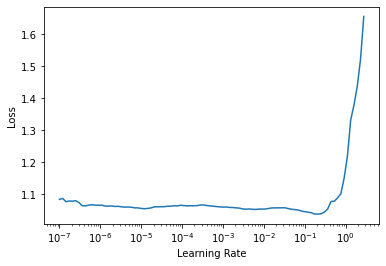

In [97]:
learn.lr_find()

<a id="training"><h1><strong>Entrenamiento</strong></h1></a>

In [98]:
learn.loss_func

<function __main__.my_fun_loss(yp, age, cats)>

In [99]:
learn.fit_one_cycle(20,lr_max=1e-4, div=0.9, pct_start=0.75)

epoch,train_loss,valid_loss,l1_age,accuracy_cats,time
0,1.034182,0.991402,0.310390,0.563317,01:23
1,1.000658,0.968786,0.309900,0.603877,01:23
2,0.979275,0.948407,0.309022,0.638887,01:23
3,0.955820,0.928089,0.307417,0.662369,01:23
4,0.925817,0.903854,0.304972,0.689523,01:23
5,0.900411,0.876795,0.301998,0.714456,01:23
6,0.872218,0.851758,0.297048,0.730168,01:23
7,0.844717,0.829793,0.291813,0.737683,01:23
8,0.823151,0.808307,0.285188,0.746905,01:23
9,0.803910,0.789078,0.277695,0.750918,01:23


>**learn.show_results()** 

> Me marco error: *AssertionError: Match length mismatch*

> Por lo que procedi a modificar la función de show results de la siguiente manera dado 
que estoy trabajando con multicategory

In [17]:
def categorias(z):
    categorias = ['adios', 'gato', 'hola', 'mama', 'papa', 'perro', 'puercoespin']
    ##############################################
    # Hacemos una lista de listas en las que tendremos el tensor de 0's y 1's asociado con su categoria
    aux = []
    zz = z
    for x in range(len(list(zz))): 
        tmp = []
        for i in zip(categorias, list(zz[x])):
            tmp.append(i)
        aux.append(tmp)
    
    # Hacemos una lista de listas en las que cada sublista tiene únicamente
    # las categorias/palabras que aperece en la imagen (es decir, los unos del arreglo anterior)
    true_category =[]
    for i in range(len(aux)):
        tmp = []
        for x in aux[i]:
            if x[1] == 1:
                tmp.append(x[0])
        true_category.append(tmp)

    return(true_category)

In [18]:
def show_results(self, max_n = 8):
    import matplotlib as mpl
    dl = self.dls.valid.new(shuffle=True)
    x,y,z = dl.one_batch()
    yp = self.model(x).view(-1)
    
    #print(x.shape, y.shape, z.shape, yp.shape)
    ##############################################
    categories = categorias(z)    
    ##############################################
    ctx = fv.get_grid(max_n)
    mpl.rcParams["text.color"] = "red"
    for i in range(max_n):
        # Edad predicha | Edad real \n [Categoria1, Categoria2]
        fv.show_image(x[i], ctx=ctx[i], title=f"{yp[i]:.1f} | {int(y[i])}\n{categories[i]}")

In [19]:
fv.Learner.show_results = show_results

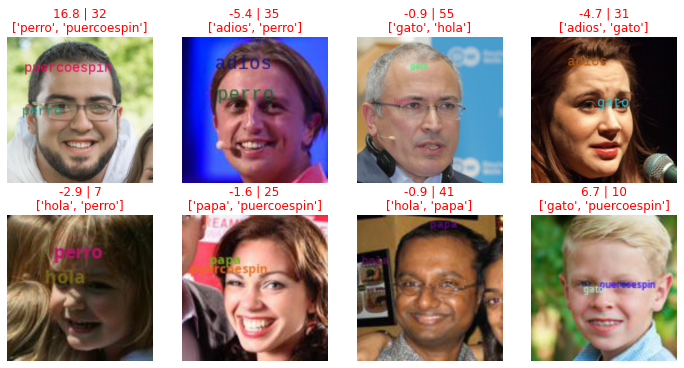

In [103]:
learn.show_results()

In [104]:
learn.unfreeze()

In [105]:
learn.fit_one_cycle(10,lr_max=1e-4, div=0.9, pct_start=0.75)

epoch,train_loss,valid_loss,l1_age,accuracy_cats,time
0,0.542627,0.482029,0.182797,0.869866,01:54
1,0.388481,0.349002,0.163949,0.927846,01:54
2,0.298430,0.278372,0.143387,0.948595,01:54
3,0.244647,0.241574,0.123608,0.955085,01:54
4,0.208074,0.193459,0.094388,0.963112,01:54
5,0.178680,0.166946,0.077757,0.966271,01:54
6,0.146184,0.181908,0.070293,0.957732,01:54
7,0.126059,0.150202,0.060040,0.966015,01:54
8,0.114600,0.139204,0.055181,0.969004,01:54
9,0.101388,0.136392,0.055000,0.969516,01:54


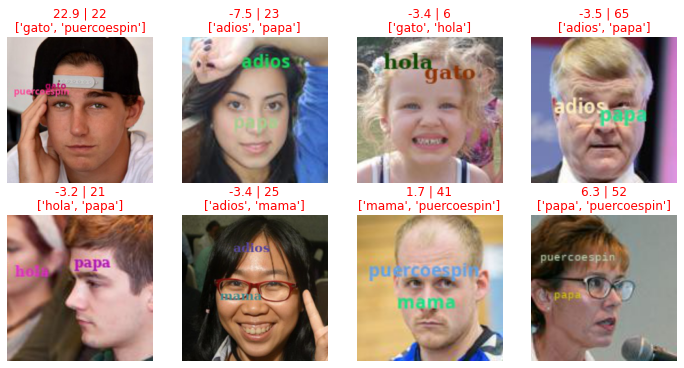

In [106]:
learn.show_results()

<a id="experiments"><h1><strong>Experimentos</strong></h1></a>
> Esta sección la añado porque obtuve resultados muy diferentes procediendo de maneras similares

In [107]:
def create_model():
    layers = [Normalizer()]
    #layers += list(fv.models.resnet18(pretrained=True).children())[:-2]
    
    ##################Modelo anterior#################
    # el que es bien chido detectando categorias pero no edades
    layers = list(fv.resnet18(pretrained=True).children())[:-1]
    layers += [fv.Flatten(), nn.Linear(512,8)]
    model = nn.Sequential(*layers)

    return (model)
    

In [108]:
model2 = create_model()
learn2 = create_learner(data, model2)

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.009120108559727669)

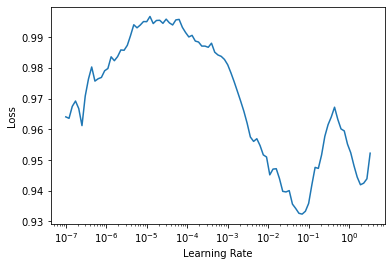

In [109]:
learn2.lr_find()

In [110]:
learn2.fit_one_cycle(5,lr_max=1e-4, div=0.9, pct_start=0.75)

epoch,train_loss,valid_loss,l1_age,accuracy_cats,time
0,0.774607,0.741854,0.272037,0.770301,01:31
1,0.608115,0.586157,0.221620,0.832551,01:31
2,0.473239,0.462434,0.159706,0.866280,01:31
3,0.363969,0.383825,0.115565,0.885321,01:31
4,0.304472,0.352066,0.098614,0.895824,01:31


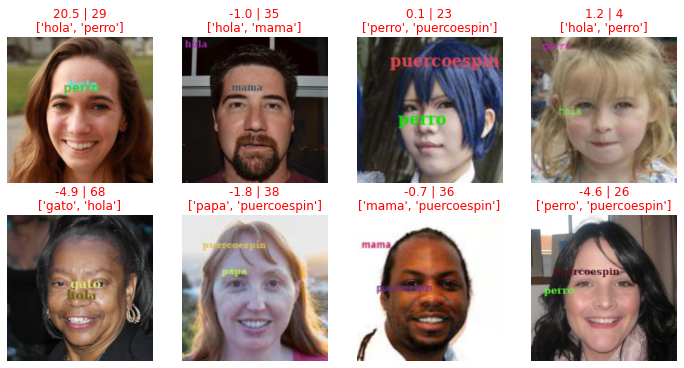

In [111]:
learn2.show_results()

In [112]:
learn2.unfreeze()

In [113]:
learn2.fit_one_cycle(5,lr_max=1e-4, div=0.9, pct_start=0.75)

epoch,train_loss,valid_loss,l1_age,accuracy_cats,time
0,0.252473,0.267749,0.078067,0.923661,01:53
1,0.196775,0.222688,0.067297,0.941508,01:53
2,0.162228,0.211978,0.066480,0.944155,01:53
3,0.138711,0.193460,0.059837,0.947742,01:53
4,0.112276,0.173829,0.056169,0.956964,01:53


> **Ahora cambiaremos por resnet101 a ver si mejora el asunto de las edades**

In [25]:
def create_model3():
    layers = [Normalizer()]
    #layers += list(fv.models.resnet18(pretrained=True).children())[:-2]
    
    layers = list(fv.resnet101(pretrained=True).children())[:-1]
    layers += [fv.Flatten(), nn.Linear(512,8)]
    model = nn.Sequential(*layers)

    return (model)

In [26]:
model3 = create_model3()
learn3 = create_learner(data, model3)

In [27]:
learn3.lr_find()

RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 7.94 GiB total capacity; 7.28 GiB already allocated; 2.00 MiB free; 7.36 GiB reserved in total by PyTorch)

> Ya no pude entrenar por falta de memoria, intente cerrando y cargando nomas lo necesario para únicamente crear el learner para este experimento y el modelo pero igual me marco problemas con la memoria :(  ya no pude ver que onda, si mejoraba o no

In [29]:
learn3.fit_one_cycle(5,lr_max=1e-4, div=0.9, pct_start=0.75)

In [ ]:
learn3.show_results()

In [ ]:
learn3.unfreeze()

In [ ]:
learn3.fit_one_cycle(5,lr_max=1e-4, div=0.9, pct_start=0.75)